# 문장 임베딩
- BERT
- OpenAI

## BERT sentence transformers 설치
- uv pip install sentence_transformers ipywidgets

In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
import pandas as pd

# import corpus
data = pd.read_table('ratings_train.txt')[:10]
data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [3]:
# BERT 모델 호출
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

In [4]:
data['embedding'] = data['document'].apply(lambda x: model.encode(x))
data

,id,document,label,embedding
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[0.1199709, 0.036388524, 0.9433599, -0.0292631..."
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[0.056858446, 0.020919, 0.7253657, 0.05481379,..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[0.07181791, -0.018124584, 0.84919286, 0.05228..."
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[0.042829074, 0.025457421, 0.8471478, 0.046056..."
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[-0.34263313, 0.22370131, 0.23183072, 0.021585..."
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,"[-0.1284231, -0.04270424, 0.5165525, -0.005466..."
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,"[0.3519894, -0.45238355, 0.65755564, 0.2169624..."
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,"[-0.3850559, -0.101053715, 0.76362723, -0.2009..."
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,"[0.23668765, -0.029815, 0.70949787, 0.21230657..."
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,"[0.082663335, -0.04860803, 0.5354299, 0.112480..."


In [5]:
import numpy as np

embeddings = np.array(data['embedding'].tolist())
embeddings.shape

(10, 768)

## OpenAI API
- OpenAI 가입
- API 이용으로 로그인
- API 첫 이용자 무료 크레딧 제공
- OpenAI API key 발급 및 저장

## OpenAI API를 활용한 임베딩
- openai 라이브러리 설치(uv pip install --upgrade openai)

# 안전한 API key 사용
- dotenv 모듈설치: python-dotenv

In [9]:
from dotenv import load_dotenv
from openai import OpenAI

load_dotenv()

True

In [10]:
openai_client = OpenAI()
openai_embedding_model = 'text-embedding-3-small'

In [20]:
def generate_openai_embedding(text):
    embedding = openai_client.embeddings.create(
        model = openai_embedding_model,
        input=text
    )
    
    return embedding.data[0].embedding

In [14]:
for text in data['document']:
    print(text)
    embeddings = generate_openai_embedding(text)
    embeddings = np.array(embeddings)
    print(embeddings, embeddings.shape)
    break

아 더빙.. 진짜 짜증나네요 목소리
[-0.00100734  0.02021617 -0.08748494 ... -0.00089626  0.01053018
 -0.0231042 ] (1536,)


# OpenAI 활용#1
- ChatGPT prompt

In [15]:
def create_openai_message(prompt, system_message):
    return [
        {'role':'system', 'content':system_message},
        {'role':'user', 'content':prompt}
    ]

def get_openai_response(prompt, system_message):
    messages = create_openai_message(prompt, system_message)
    completion = openai_client.chat.completions.create(
        model = 'gpt-3.5-turbo-0125',
        messages = messages
    )
    return completion.choices[0].message.content

In [16]:
system_message = """ You will be working as an AI text editor specializing in Korean. 
You will be reviewing the movie reviews in Korean. Rephrase the review using standard Korean language and correct any typos.
Your response will  be from a first-person perspective, ensuring there is not grammar error or typo.
stay focused on the content while rephrasing the review, and avoid overestimating what the text is originally meant to convey.
Before suggesting an answer, make sure to use standard language and ensure there is no misspelled word.
Do no answer in English, but only in Korean.
"""

In [17]:
for text in data['document']:
    response = get_openai_response(text, system_message)
    print(text, '>>', response)
    break

아 더빙.. 진짜 짜증나네요 목소리 >> 더빙이 정말 짜증나네요.


# OpenAPI 활용 #2
- 사용자 영화리뷰 > 표준 한국어 변환
- 임베딩

In [21]:
data_new = pd.read_table('ratings_train.txt')[:10]
data_new['new_doc'] = data_new['document'].apply(lambda x: get_openai_response(x, system_message))
data_new

In [22]:
data_new

,id,document,label,new_doc
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,더빙이 정말 짜증나네요.
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,음... 포스터를 보니 초딩 영화같다고 생각했는데... 오버연기조차 가볍지 않네요.
2,10265843,너무재밓었다그래서보는것을추천한다,0,너무 재밌었어요. 그래서 보는 것을 추천합니다.
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기네요. 솔직히 재미가 없네요. 평점을 조정해야겠습니다.
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이먼 페그의 액센트 있는 연기가 빛을 발했던 영화였어요! '스파이더맨'에서 나이들...
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,3세부터 초등학교 1학년생인 8살 아이들을 위한 영화입니다. ㅋㅋㅋ... 별 반개도...
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,원작의 긴장감을 충분히 전달하지 못했다.
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,한 줄거리로 논하면서 이 응경과 길용우의 연기에 대해 생각해 볼까요? 이 드라마에서...
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,액션은 거의 없지만 재미있는 소수의 영화입니다.
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,평점이 낮은 이유가 뭘까요? 저는 꽤 볼 만한 영화인 것 같아요. 혹시 너무 화려한...


In [23]:
data_new['embedding'] = data_new['new_doc'].apply(lambda x: generate_openai_embedding(x))
data_new

,id,document,label,new_doc,embedding
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,더빙이 정말 짜증나네요.,"[-0.0005939450929872692, 0.011094553396105766,..."
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,음... 포스터를 보니 초딩 영화같다고 생각했는데... 오버연기조차 가볍지 않네요.,"[0.014291342347860336, 0.028760354965925217, -..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,너무 재밌었어요. 그래서 보는 것을 추천합니다.,"[0.00012129753304179758, 0.015942534431815147,..."
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기네요. 솔직히 재미가 없네요. 평점을 조정해야겠습니다.,"[0.010820994153618813, 0.043167244642972946, -..."
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이먼 페그의 액센트 있는 연기가 빛을 발했던 영화였어요! '스파이더맨'에서 나이들...,"[0.03639664873480797, 0.010264209471642971, -0..."
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,3세부터 초등학교 1학년생인 8살 아이들을 위한 영화입니다. ㅋㅋㅋ... 별 반개도...,"[0.014997780323028564, 0.0031587411649525166, ..."
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,원작의 긴장감을 충분히 전달하지 못했다.,"[0.059032145887613297, 0.03224200755357742, -0..."
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,한 줄거리로 논하면서 이 응경과 길용우의 연기에 대해 생각해 볼까요? 이 드라마에서...,"[0.019329937174916267, 0.03923424705862999, -0..."
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,액션은 거의 없지만 재미있는 소수의 영화입니다.,"[-0.03305111452937126, 0.06128055602312088, -0..."
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,평점이 낮은 이유가 뭘까요? 저는 꽤 볼 만한 영화인 것 같아요. 혹시 너무 화려한...,"[-0.017360996454954147, -0.0047728875651955605..."


In [24]:
data_new = data_new.drop('document', axis=1)
data_new

,id,label,new_doc,embedding
0,9976970,0,더빙이 정말 짜증나네요.,"[-0.0005939450929872692, 0.011094553396105766,..."
1,3819312,1,음... 포스터를 보니 초딩 영화같다고 생각했는데... 오버연기조차 가볍지 않네요.,"[0.014291342347860336, 0.028760354965925217, -..."
2,10265843,0,너무 재밌었어요. 그래서 보는 것을 추천합니다.,"[0.00012129753304179758, 0.015942534431815147,..."
3,9045019,0,교도소 이야기네요. 솔직히 재미가 없네요. 평점을 조정해야겠습니다.,"[0.010820994153618813, 0.043167244642972946, -..."
4,6483659,1,사이먼 페그의 액센트 있는 연기가 빛을 발했던 영화였어요! '스파이더맨'에서 나이들...,"[0.03639664873480797, 0.010264209471642971, -0..."
5,5403919,0,3세부터 초등학교 1학년생인 8살 아이들을 위한 영화입니다. ㅋㅋㅋ... 별 반개도...,"[0.014997780323028564, 0.0031587411649525166, ..."
6,7797314,0,원작의 긴장감을 충분히 전달하지 못했다.,"[0.059032145887613297, 0.03224200755357742, -0..."
7,9443947,0,한 줄거리로 논하면서 이 응경과 길용우의 연기에 대해 생각해 볼까요? 이 드라마에서...,"[0.019329937174916267, 0.03923424705862999, -0..."
8,7156791,1,액션은 거의 없지만 재미있는 소수의 영화입니다.,"[-0.03305111452937126, 0.06128055602312088, -0..."
9,5912145,1,평점이 낮은 이유가 뭘까요? 저는 꽤 볼 만한 영화인 것 같아요. 혹시 너무 화려한...,"[-0.017360996454954147, -0.0047728875651955605..."


In [26]:
embeddings = np.array(data_new['embedding'].tolist())
embeddings.shape

(10, 1536)

# 차원축소 및 시각화
- scikit learn : uv pip install scikit-learn
- matplotlib : uv pip install matplotlib

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(embeddings)
pca_components

array([[ 0.4519379 ,  0.47544268],
       [-0.25533388, -0.21567333],
       [ 0.19390711,  0.41939086],
       [ 0.31676435, -0.11256374],
       [-0.43289129,  0.39842496],
       [-0.38099103,  0.01233298],
       [ 0.37200981, -0.38956587],
       [ 0.09967279, -0.41586612],
       [-0.04393941, -0.02622755],
       [-0.32113636, -0.14569488]])

In [32]:
data_new['pca1'] = pca_components[:,0]
data_new['pca2'] = pca_components[:,1]
data_new

,id,label,new_doc,embedding,pca1,pca2
0,9976970,0,더빙이 정말 짜증나네요.,"[-0.0005939450929872692, 0.011094553396105766,...",0.451938,0.475443
1,3819312,1,음... 포스터를 보니 초딩 영화같다고 생각했는데... 오버연기조차 가볍지 않네요.,"[0.014291342347860336, 0.028760354965925217, -...",-0.255334,-0.215673
2,10265843,0,너무 재밌었어요. 그래서 보는 것을 추천합니다.,"[0.00012129753304179758, 0.015942534431815147,...",0.193907,0.419391
3,9045019,0,교도소 이야기네요. 솔직히 재미가 없네요. 평점을 조정해야겠습니다.,"[0.010820994153618813, 0.043167244642972946, -...",0.316764,-0.112564
4,6483659,1,사이먼 페그의 액센트 있는 연기가 빛을 발했던 영화였어요! '스파이더맨'에서 나이들...,"[0.03639664873480797, 0.010264209471642971, -0...",-0.432891,0.398425
5,5403919,0,3세부터 초등학교 1학년생인 8살 아이들을 위한 영화입니다. ㅋㅋㅋ... 별 반개도...,"[0.014997780323028564, 0.0031587411649525166, ...",-0.380991,0.012333
6,7797314,0,원작의 긴장감을 충분히 전달하지 못했다.,"[0.059032145887613297, 0.03224200755357742, -0...",0.372010,-0.389566
7,9443947,0,한 줄거리로 논하면서 이 응경과 길용우의 연기에 대해 생각해 볼까요? 이 드라마에서...,"[0.019329937174916267, 0.03923424705862999, -0...",0.099673,-0.415866
8,7156791,1,액션은 거의 없지만 재미있는 소수의 영화입니다.,"[-0.03305111452937126, 0.06128055602312088, -0...",-0.043939,-0.026228
9,5912145,1,평점이 낮은 이유가 뭘까요? 저는 꽤 볼 만한 영화인 것 같아요. 혹시 너무 화려한...,"[-0.017360996454954147, -0.0047728875651955605...",-0.321136,-0.145695


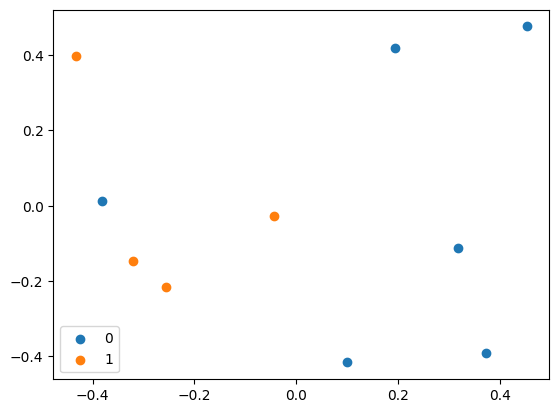

In [34]:
import matplotlib.pyplot as plt

label_0 = data_new.query('label==0')
label_1 = data_new.query('label==1')

plt.scatter(label_0['pca1'], label_0['pca2'], label='0')
plt.scatter(label_1['pca1'], label_1['pca2'], label='1')
plt.legend()
plt.show()